# Flower Image classification using ConvNets

This notebook is heavily inspired by the chapter on convnets from [François Chollet's](https://www.linkedin.com/in/fchollet/ "Linkedin") book : [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

The objective is to train a neural net model in capable of classifying a flower as one of the following 5 classes:
* Daisy
* Dandelion
* Rose
* Sunflower
* Tulip

The dataset is hosted on kaggle ([link](https://www.kaggle.com/alxmamaev/flowers-recognition/data "Flowers")).

As per usual neural nets required lots of computing resources (i.e. GPUs), I used [Google Colab](https://colab.research.google.com/) which is a great tool for testing your models on GPU machines for free in a jupyter notebook-like environment.

For more details on Google Colab see:
* [A cool kaggle discussion channel on google colab](https://www.kaggle.com/getting-started/47096)
* [An excellent article about google colab on medium](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)
* [A short guide for using google colab with fastai tutorials](https://towardsdatascience.com/fast-ai-lesson-1-on-google-colab-free-gpu-d2af89f53604)

...


In [0]:
ls

data/  datalab/


### Create the directory where we'll store the downloaded data

In [0]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


Let's

In [0]:
ls

data/  datalab/


In [0]:
%cd data/

/content/data


In [0]:
!mkdir data_flowers

In [0]:
ls

data_flowers/  flowers/  flowers-recognition.zip  flowers.zip


In [0]:
!pip install kaggle

#### Connect to drive and search the file 'kaggle.json', whre my kaggle API credentials are stored

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge          8           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11171            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5245           False  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2394           False  


In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition -p ./

flowers-recognition.zip: Downloaded 225MB of 225MB


In [0]:
ls

data_flowers/  flowers-recognition.zip  flowers.zip


In [0]:
!rm flowers.zip
!unzip flowers-recognition.zip -d ./

Archive:  flowers-recognition.zip
  inflating: ./flowers.zip           


In [0]:
ls 

data_flowers/  flowers-recognition.zip  flowers.zip


In [0]:
!unzip flowers.zip -d ./

Archive:  flowers.zip
   creating: ./flowers/
   creating: ./flowers/daisy/
  inflating: ./flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: ./flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: ./flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: ./flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: ./flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: ./flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: ./flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: ./flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: ./flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: ./flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: ./flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: ./flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: ./flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: ./flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: ./flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: ./flowers/daisy/10555815624_dc21

  inflating: ./flowers/daisy/4993492878_11fd4f5d12.jpg  
  inflating: ./flowers/daisy/5014137563_d03eb0ed75_n.jpg  
  inflating: ./flowers/daisy/5054771689_00dd40b971_n.jpg  
  inflating: ./flowers/daisy/5058708968_8bdcd29e63_n.jpg  
  inflating: ./flowers/daisy/506018088_4f7a15a7c5_n.jpg  
  inflating: ./flowers/daisy/506348009_9ecff8b6ef.jpg  
  inflating: ./flowers/daisy/5087720485_c0914fb623.jpg  
  inflating: ./flowers/daisy/510844526_858b8fe4db.jpg  
  inflating: ./flowers/daisy/5109508979_68e3530791_m.jpg  
  inflating: ./flowers/daisy/5110105726_53eb7a93be_m.jpg  
  inflating: ./flowers/daisy/5110107234_12ddc0206b_m.jpg  
  inflating: ./flowers/daisy/5110109540_beed4ed162_m.jpg  
  inflating: ./flowers/daisy/5110110938_9da91455c4_m.jpg  
  inflating: ./flowers/daisy/512177035_70afc925c8.jpg  
  inflating: ./flowers/daisy/512477177_d9004cbcf1_n.jpg  
  inflating: ./flowers/daisy/5133243796_44de429de5_m.jpg  
  inflating: ./flowers/daisy/5135131051_102d4878ca_n.jpg  
 extracting:

  inflating: ./flowers/dandelion/18111636378_856027a7b8_n.jpg  
  inflating: ./flowers/dandelion/18183515403_13a9ca6d86_n.jpg  
  inflating: ./flowers/dandelion/18204150090_fb418bbddb.jpg  
  inflating: ./flowers/dandelion/18215579866_94b1732f24.jpg  
  inflating: ./flowers/dandelion/18232119726_cef27eaaac_n.jpg  
  inflating: ./flowers/dandelion/18238604119_a5689980ee_n.jpg  
  inflating: ./flowers/dandelion/18243329421_771b4d938e.jpg  
  inflating: ./flowers/dandelion/18243351371_5fda92ac0a_n.jpg  
  inflating: ./flowers/dandelion/18271576032_d7e2296de4_n.jpg  
  inflating: ./flowers/dandelion/18276105805_d31d3f7e71.jpg  
  inflating: ./flowers/dandelion/18282528206_7fb3166041.jpg  
  inflating: ./flowers/dandelion/18304194360_2a4a0be631_m.jpg  
  inflating: ./flowers/dandelion/18342918441_b1bb69a2fd_n.jpg  
  inflating: ./flowers/dandelion/18385846351_3a2bf60427_n.jpg  
  inflating: ./flowers/dandelion/18479635994_83f93f4120.jpg  
  inflating: ./flowers/dandelion/18482768066_677292a

  inflating: ./flowers/dandelion/5140791232_52f2c5b41d_n.jpg  
  inflating: ./flowers/dandelion/515143813_b3afb08bf9.jpg  
  inflating: ./flowers/dandelion/5217892384_3edce91761_m.jpg  
  inflating: ./flowers/dandelion/5416388641_c66d52d2ff_m.jpg  
  inflating: ./flowers/dandelion/5446666484_365f3be83a_n.jpg  
  inflating: ./flowers/dandelion/5572197407_a0047238a6.jpg  
  inflating: ./flowers/dandelion/5596093561_09b0301136_n.jpg  
  inflating: ./flowers/dandelion/5598014250_684c28bd5c_n.jpg  
  inflating: ./flowers/dandelion/5598591979_ed9af1b3e9_n.jpg  
  inflating: ./flowers/dandelion/5598845098_13e8e9460f.jpg  
  inflating: ./flowers/dandelion/5600240736_4a90c10579_n.jpg  
  inflating: ./flowers/dandelion/5605093210_5fecb71c61.jpg  
  inflating: ./flowers/dandelion/5605502523_05acb00ae7_n.jpg  
  inflating: ./flowers/dandelion/5607256228_2294c201b3.jpg  
  inflating: ./flowers/dandelion/5607669502_ccd2a76668_n.jpg  
  inflating: ./flowers/dandelion/5607983792_f8b8766ff7.jpg  
  inf

  inflating: ./flowers/rose/17291451621_0e39f08b9e_n.jpg  
  inflating: ./flowers/rose/17291930305_79deae6a90_n.jpg  
  inflating: ./flowers/rose/17302463621_d82be11f01_n.jpg  
  inflating: ./flowers/rose/17305246720_1866d6303b.jpg  
  inflating: ./flowers/rose/174109630_3c544b8a2f.jpg  
  inflating: ./flowers/rose/17449165090_dfb27af360_n.jpg  
  inflating: ./flowers/rose/17554868955_35f48516cd_m.jpg  
  inflating: ./flowers/rose/1756973583_4aac7df00d_m.jpg  
  inflating: ./flowers/rose/1757822526_fe30b9b3ca_m.jpg  
 extracting: ./flowers/rose/1775233884_12ff5a124f.jpg  
  inflating: ./flowers/rose/17867791274_25bb3f8a41_n.jpg  
  inflating: ./flowers/rose/17869810353_c0d9902bc3_n.jpg  
  inflating: ./flowers/rose/17869839663_1445f1efd0_n.jpg  
  inflating: ./flowers/rose/17869846573_d6c9c39843_n.jpg  
  inflating: ./flowers/rose/1788484468_f73afa6c32_n.jpg  
  inflating: ./flowers/rose/1793211631_68c31a74dc.jpg  
  inflating: ./flowers/rose/17953368844_be3d18cf30_m.jpg  
  inflating:

  inflating: ./flowers/rose/6241886381_cc722785af.jpg  
  inflating: ./flowers/rose/6255593451_b8a3aa8f7a_m.jpg  
  inflating: ./flowers/rose/6280787884_141cd7b382_n.jpg  
  inflating: ./flowers/rose/6309548569_932fee8313_m.jpg  
  inflating: ./flowers/rose/6347846687_3f0a7c3176.jpg  
  inflating: ./flowers/rose/6347846935_51e3dc2481_n.jpg  
  inflating: ./flowers/rose/6347847065_83cf87333b_n.jpg  
  inflating: ./flowers/rose/6363951285_a802238d4e.jpg  
  inflating: ./flowers/rose/6363976189_e7155e5f9c.jpg  
  inflating: ./flowers/rose/6409000675_6eb6806e59.jpg  
  inflating: ./flowers/rose/6473543547_4fefdbd5dc.jpg  
  inflating: ./flowers/rose/6653567281_768a1fd160.jpg  
  inflating: ./flowers/rose/6690926183_afedba9f15_n.jpg  
  inflating: ./flowers/rose/6732261031_861a1026fa_n.jpg  
 extracting: ./flowers/rose/685724528_6cd5cbe203.jpg  
  inflating: ./flowers/rose/6864417932_36fa4ceecf_n.jpg  
  inflating: ./flowers/rose/6867597533_d65d1c39fb_n.jpg  
  inflating: ./flowers/rose/687

  inflating: ./flowers/sunflower/23894449029_bf0f34d35d_n.jpg  
  inflating: ./flowers/sunflower/2425164088_4a5d2cdf21_n.jpg  
 extracting: ./flowers/sunflower/244074259_47ce6d3ef9.jpg  
  inflating: ./flowers/sunflower/2442985637_8748180f69.jpg  
  inflating: ./flowers/sunflower/2443095419_17b920d155_m.jpg  
  inflating: ./flowers/sunflower/2443921986_d4582c123a.jpg  
  inflating: ./flowers/sunflower/24459548_27a783feda.jpg  
  inflating: ./flowers/sunflower/24459750_eb49f6e4cb_m.jpg  
  inflating: ./flowers/sunflower/253586685_ee5b5f5232.jpg  
  inflating: ./flowers/sunflower/2575272111_f04d79b9af_n.jpg  
  inflating: ./flowers/sunflower/2588234269_c4bfd0d8b9_n.jpg  
  inflating: ./flowers/sunflower/2588453601_66f2a03cca_n.jpg  
  inflating: ./flowers/sunflower/2598973480_07de93e91d_n.jpg  
  inflating: ./flowers/sunflower/2619000556_6634478e64_n.jpg  
  inflating: ./flowers/sunflower/26254755_1bfc494ef1_n.jpg  
  inflating: ./flowers/sunflower/265422922_bbbde781d2_m.jpg  
 extractin

  inflating: ./flowers/sunflower/9213511121_836a458021_m.jpg  
  inflating: ./flowers/sunflower/9216286162_6ceefdd1b4_m.jpg  
 extracting: ./flowers/sunflower/9216286876_289a4779f7.jpg  
  inflating: ./flowers/sunflower/9231555352_d2dd8f8e68_m.jpg  
  inflating: ./flowers/sunflower/9240005603_6a9b71dcea_n.jpg  
  inflating: ./flowers/sunflower/9240129413_f240ce7866_n.jpg  
  inflating: ./flowers/sunflower/9246304620_768d1f54d7_n.jpg  
 extracting: ./flowers/sunflower/9302733302_2cb92cf275.jpg  
  inflating: ./flowers/sunflower/9309473873_9d62b9082e.jpg  
 extracting: ./flowers/sunflower/9339697826_88c9c4dc50.jpg  
  inflating: ./flowers/sunflower/9359374034_21fb12d613_n.jpg  
  inflating: ./flowers/sunflower/9375675309_987d32f99e_n.jpg  
  inflating: ./flowers/sunflower/9381481549_5a5d503e42_n.jpg  
  inflating: ./flowers/sunflower/9384867134_83af458a19_n.jpg  
  inflating: ./flowers/sunflower/9399711558_7cb9547cd3_n.jpg  
  inflating: ./flowers/sunflower/9400904374_37723396e3_n.jpg  


  inflating: ./flowers/tulip/2232289392_9a79a0c5cb_n.jpg  
  inflating: ./flowers/tulip/2243427551_809b603992_z.jpg  
  inflating: ./flowers/tulip/2249756775_02e693beda_n.jpg  
  inflating: ./flowers/tulip/2254152047_d3bf8903cd_n.jpg  
  inflating: ./flowers/tulip/2256214682_130c01d9d9.jpg  
 extracting: ./flowers/tulip/2256230386_08b54ca760.jpg  
  inflating: ./flowers/tulip/2271507463_15c48d41c4_n.jpg  
  inflating: ./flowers/tulip/2272006181_785f1be94f_n.jpg  
  inflating: ./flowers/tulip/2280950463_86510c2789_n.jpg  
  inflating: ./flowers/tulip/2294116183_a30d2aa2c1_m.jpg  
  inflating: ./flowers/tulip/2322670828_34115a7050.jpg  
  inflating: ./flowers/tulip/2333321040_3960b9d67e_n.jpg  
  inflating: ./flowers/tulip/2336919121_851ebc4754.jpg  
  inflating: ./flowers/tulip/2344751399_71620039f2_n.jpg  
  inflating: ./flowers/tulip/2351637471_5dd34fd3ac_n.jpg  
  inflating: ./flowers/tulip/2361075034_cf730b8682.jpg  
  inflating: ./flowers/tulip/2374855021_21959b40c0_n.jpg  
  infla

  inflating: ./flowers/tulip/8668973377_c69527db42_m.jpg  
  inflating: ./flowers/tulip/8668974855_8389ecbdca_m.jpg  
  inflating: ./flowers/tulip/8669794378_97dda6036f_n.jpg  
  inflating: ./flowers/tulip/8673412732_f8fd690ee4_n.jpg  
  inflating: ./flowers/tulip/8673416166_620fc18e2f_n.jpg  
  inflating: ./flowers/tulip/8673416556_639f5c88f1_n.jpg  
 extracting: ./flowers/tulip/8677713853_1312f65e71.jpg  
  inflating: ./flowers/tulip/8681825637_837a63513a_n.jpg  
  inflating: ./flowers/tulip/8686013485_3c4dfbfd1f_n.jpg  
  inflating: ./flowers/tulip/8686332852_c6dcb2e86b.jpg  
  inflating: ./flowers/tulip/8687675254_c93f50d8b0_m.jpg  
  inflating: ./flowers/tulip/8688502760_1c8d6de921_m.jpg  
  inflating: ./flowers/tulip/8689672277_b289909f97_n.jpg  
  inflating: ./flowers/tulip/8690789564_394eb04982_n.jpg  
  inflating: ./flowers/tulip/8690791226_b1f015259f_n.jpg  
  inflating: ./flowers/tulip/8695367666_0809529eaf_n.jpg  
 extracting: ./flowers/tulip/8695372372_302135aeb2.jpg  
  i

In [0]:
import os, shutil

In [0]:
print("# of daisy",len(os.listdir('flowers/daisy/')))
print("# of dandelion",len(os.listdir('flowers/dandelion/')))
print("# of rose",len(os.listdir('flowers/rose/')))
print("# of sunflower",len(os.listdir('flowers/sunflower/')))
print("# of tulip",len(os.listdir('flowers/tulip/')))

# of daisy 769
# of dandelion 1055
# of rose 784
# of sunflower 734
# of tulip 984


In [0]:
ls flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


### Splitting data into train, validation and test sets

In [0]:
original_dataset_dir = 'flowers'
base_dir = 'data_flowers'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir)

##Training directories
train_daisy_dir = os.path.join(train_dir, 'daisy')
if not os.path.exists(train_daisy_dir): os.mkdir(train_daisy_dir)

train_dandelion_dir = os.path.join(train_dir, 'dandelion')
if not os.path.exists(train_dandelion_dir): os.mkdir(train_dandelion_dir)

train_rose_dir = os.path.join(train_dir, 'rose')
if not os.path.exists(train_rose_dir): os.mkdir(train_rose_dir)

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
if not os.path.exists(train_sunflower_dir): os.mkdir(train_sunflower_dir)

train_tulip_dir = os.path.join(train_dir, 'tulip')
if not os.path.exists(train_tulip_dir): os.mkdir(train_tulip_dir)

##Valid dirs

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
if not os.path.exists(validation_daisy_dir): os.mkdir(validation_daisy_dir)

validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
if not os.path.exists(validation_dandelion_dir): os.mkdir(validation_dandelion_dir)

validation_rose_dir = os.path.join(validation_dir, 'rose')
if not os.path.exists(validation_rose_dir): os.mkdir(validation_rose_dir)

validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
if not os.path.exists(validation_sunflower_dir): os.mkdir(validation_sunflower_dir)

validation_tulip_dir = os.path.join(validation_dir, 'tulip')
if not os.path.exists(validation_tulip_dir): os.mkdir(validation_tulip_dir)


##test dirs
test_daisy_dir = os.path.join(test_dir, 'daisy')
if not os.path.exists(test_daisy_dir): os.mkdir(test_daisy_dir)

test_dandelion_dir = os.path.join(test_dir, 'dandelion')
if not os.path.exists(test_dandelion_dir): os.mkdir(test_dandelion_dir)

test_rose_dir = os.path.join(test_dir, 'rose')
if not os.path.exists(test_rose_dir): os.mkdir(test_rose_dir)

test_sunflower_dir = os.path.join(test_dir, 'sunflower')
if not os.path.exists(test_sunflower_dir): os.mkdir(test_sunflower_dir)

test_tulip_dir = os.path.join(test_dir, 'tulip')
if not os.path.exists(test_tulip_dir): os.mkdir(test_tulip_dir)


In [0]:
ls data_flowers

test/  train/  validation/


In [0]:
ls data_flowers/test/

daisy/  dandelion/  rose/  sunflower/  tulip/


In [0]:
prop = 0.7

In [0]:
from random import shuffle
for flower_class in os.listdir('flowers'):
    dist_train = 'data_flowers/train/'+flower_class+'/'
    dist_val = 'data_flowers/validation/'+flower_class+'/'
    dist_test = 'data_flowers/test/'+flower_class+'/'
    flower_img = os.listdir('flowers/'+flower_class)
    shuffle(flower_img)
    size_class = int(len(flower_img)*prop)
    img_train = flower_img[:size_class]
    img_val = flower_img[size_class: int(len(flower_img)*(prop+0.2))]
    img_test = flower_img[int(len(flower_img)*(prop+0.2)):]
    for img in img_train:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_train)
    for img in img_val:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_val)
    for img in img_test:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_test)

In [0]:
#ls data_flowers/test/dandelion/

In [0]:
print("# daisy train:",len(os.listdir(train_daisy_dir)))
print("# daisy test:",len(os.listdir(test_daisy_dir)))
print("# daisy val:",len(os.listdir(validation_daisy_dir)))

# daisy train: 699
# daisy test: 143
# daisy val: 269


In [0]:
print("# dandelion train:",len(os.listdir(train_dandelion_dir)))
print("# dandelion test:",len(os.listdir(test_dandelion_dir)))
print("# dandelion val:",len(os.listdir(validation_dandelion_dir)))

# dandelion train: 960
# dandelion test: 198
# dandelion val: 378


In [0]:
960+198+378

1536

In [0]:
print("# rose train:",len(os.listdir(train_rose_dir)))
print("# rose test:",len(os.listdir(test_rose_dir)))
print("# rose val:",len(os.listdir(validation_rose_dir)))

# rose train: 548
# rose test: 79
# rose val: 157


In [0]:
print("# sunflower train:",len(os.listdir(train_sunflower_dir)))
print("# sunflower test:",len(os.listdir(test_sunflower_dir)))
print("# sunflower val:",len(os.listdir(validation_sunflower_dir)))

# sunflower train: 513
# sunflower test: 74
# sunflower val: 147


In [0]:
print("# tulip train:",len(os.listdir(train_tulip_dir)))
print("# tulip test:",len(os.listdir(test_tulip_dir)))
print("# tulip val:",len(os.listdir(validation_tulip_dir)))

# tulip train: 688
# tulip test: 99
# tulip val: 197


### Plotting some sample flowers

In [0]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy import misc
from scipy.misc.pilutil import imread, imresize, imsave

input_shape = (224, 224)

def plot_examples(path):
    print('Images belonging to class:', path)
    listdir = os.listdir(path)
    fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
    ax = ax.ravel()
    for idx, e in enumerate(listdir[:10]):
        img = imread(os.path.join(path, e))
        img = imresize(img,input_shape)
        ax[idx].imshow(img)

Images belonging to class: data_flowers/test/daisy


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


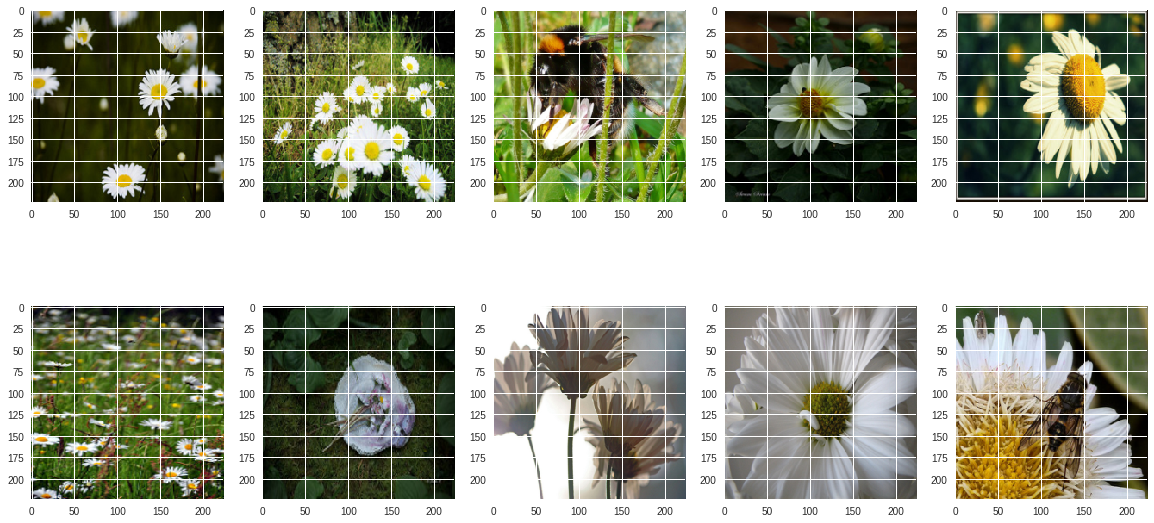

In [0]:
plot_examples(test_daisy_dir)

Images belonging to class: data_flowers/test/dandelion


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


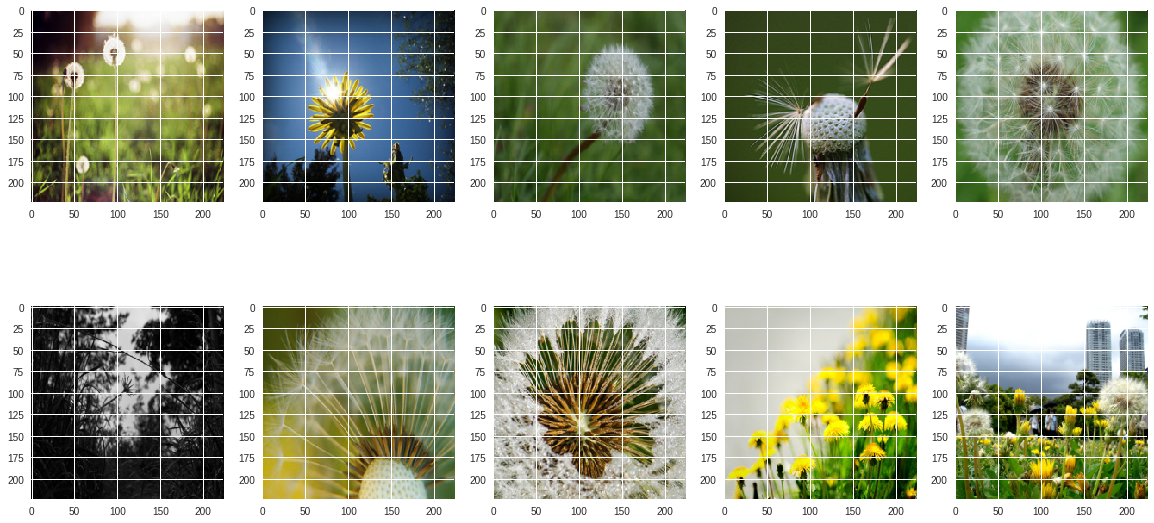

In [0]:
plot_examples(test_dandelion_dir)

Images belonging to class: data_flowers/test/rose


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


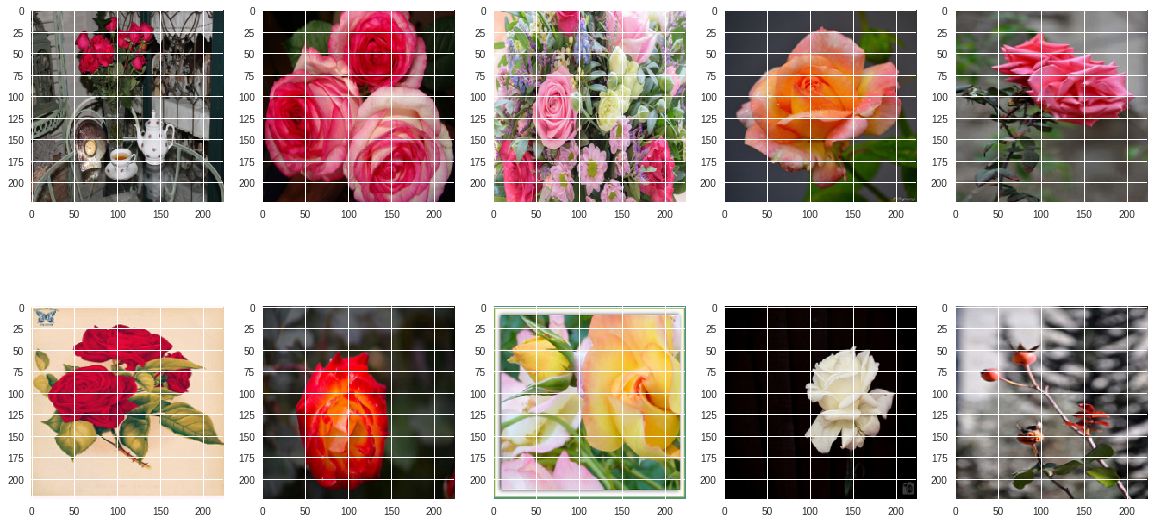

In [0]:
plot_examples(test_rose_dir)

Images belonging to class: data_flowers/test/sunflower


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


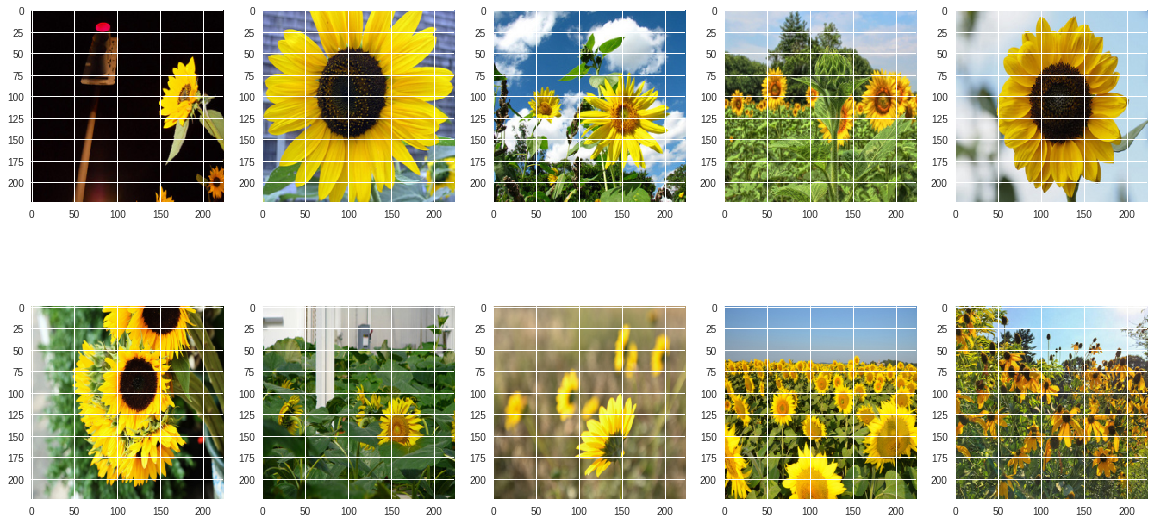

In [0]:
plot_examples(test_sunflower_dir)

Images belonging to class: data_flowers/test/tulip


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


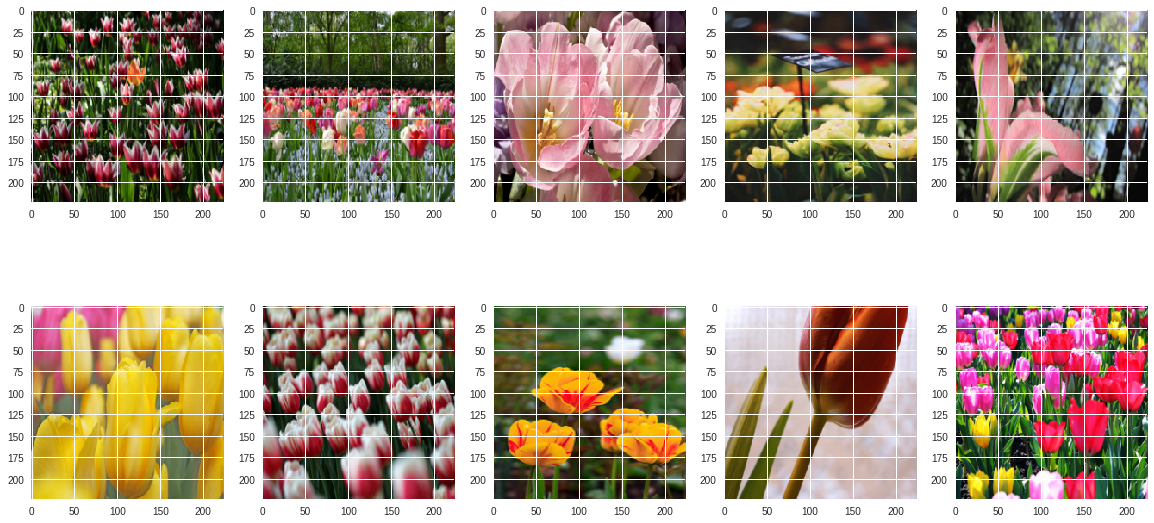

In [0]:
plot_examples(test_tulip_dir)

### Instantiating a small convnet for classification

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20, 
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 3023 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [0]:
from keras.callbacks import ModelCheckpoint

### Connect and mount the googledrive directory on colab

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p /drive
!google-drive-ocamlfuse /drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
ls /drive/DeepLearning/

ls: cannot access '/drive/DeepLearning/flowers': No such file or directory
fastai/                       test_labels_from_vgg16.npy
flowers                       train_features_from_vgg16.npy
flowers_classif.ipynb         train_labels_from_vgg16.npy
test_fastai.ipynb             validation_features_from_vgg16.npy
test_features_from_vgg16.npy  validation_labels_from_vgg16.npy


In [0]:
if not os.path.exists('/drive/DeepLearning/flowers/baseline_models'):
  os.mkdir('/drive/DeepLearning/flowers/baseline_models')
  
filepath = '/drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

FileNotFoundError: ignored

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                             callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 16s 159ms/step - loss: 1.3592 - acc: 0.3915 - val_loss: 1.1674 - val_acc: 0.4497
Epoch 2/30
100/100 [==============================] - 13s 133ms/step - loss: 1.1809 - acc: 0.4940 - val_loss: 1.2319 - val_acc: 0.4345
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 1.0993 - acc: 0.5495 - val_loss: 1.1921 - val_acc: 0.5076
Epoch 4/30
 56/100 [===============>..............] - ETA: 4s - loss: 1.0194 - acc: 0.6027100/100 [==============================] - 13s 133ms/step - loss: 1.0134 - acc: 0.6050 - val_loss: 1.0380 - val_acc: 0.5970
Epoch 5/30
100/100 [==============================] - 13s 131ms/step - loss: 0.9665 - acc: 0.6188 - val_loss: 0.9346 - val_acc: 0.6386
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.9297 - acc: 0.6290 - val_loss: 0.9587 - val_acc: 0.6244
Epoch 7/30
 86/100 [========================>.....] - ETA: 1s - loss: 0.8525 - acc: 0.6593100/100 [============

In [0]:
import matplotlib.pyplot as plt

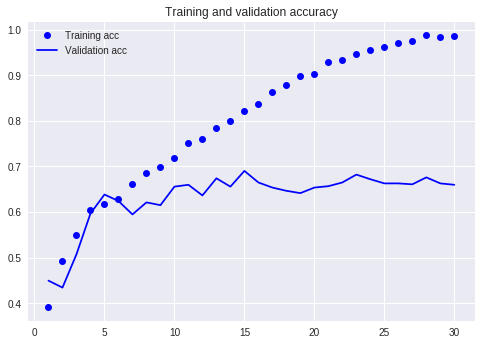

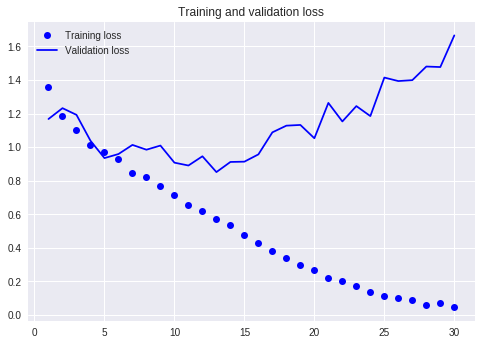

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Data augmenntation with dropout regularization

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)       147584    
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 3023 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/100
100/100 [==============================] - 57s 567ms/step - loss: 1.2233 - acc: 0.4657 - val_loss: 1.1637 - val_acc: 0.5339
Epoch 2/100
100/100 [==============================] - 54s 537ms/step - loss: 1.1633 - acc: 0.5059 - val_loss: 1.1574 - val_acc: 0.5253
Epoch 3/100
100/100 [==============================] - 53s 534ms/step - loss: 1.1154 - acc: 0.5406 - val_loss: 1.0391 - val_acc: 0.5684
Epoch 4/100
 63/100 [=================>............] - ETA: 17s - loss: 1.0756 - acc: 0.5550100/100 [==============================] - 53s 531ms/step - loss: 1.0487 - acc: 0.5650 - val_loss: 1.0006 - val_acc: 0.5845
Epoch 5/100
100/100 [==============================] - 53s 533ms/step - loss: 1.0350 - acc: 0.5684 - val_loss: 1.0251 - val_acc: 0.5963
Epoch 6/100
100/100 [==============================] - 53s 532ms/step - loss: 0.9896 - acc: 0.6014 - val_loss: 0.9526 - val_acc: 0.6136
Epoch 7/100
 82/100 [=======================>......] - ETA: 8s - loss: 0.9770 - acc: 0.6034100/100 [====

 84/100 [========================>.....] - ETA: 7s - loss: 0.5868 - acc: 0.7764100/100 [==============================] - 54s 540ms/step - loss: 0.5827 - acc: 0.7816 - val_loss: 0.6393 - val_acc: 0.7632
Epoch 53/100
100/100 [==============================] - 53s 529ms/step - loss: 0.5628 - acc: 0.7921 - val_loss: 0.7897 - val_acc: 0.7298
Epoch 54/100
100/100 [==============================] - 54s 538ms/step - loss: 0.5619 - acc: 0.7805 - val_loss: 0.5945 - val_acc: 0.7718
Epoch 55/100
 84/100 [========================>.....] - ETA: 7s - loss: 0.5461 - acc: 0.7883100/100 [==============================] - 54s 544ms/step - loss: 0.5483 - acc: 0.7855 - val_loss: 0.6326 - val_acc: 0.7696
Epoch 56/100
100/100 [==============================] - 54s 537ms/step - loss: 0.5591 - acc: 0.7915 - val_loss: 0.6338 - val_acc: 0.7707
Epoch 57/100
100/100 [==============================] - 54s 544ms/step - loss: 0.5415 - acc: 0.7887 - val_loss: 0.6282 - val_acc: 0.7793
Epoch 58/100
 84/100 [===========

#### Saving the model on my google drive

First, install necessary packages on the VM in order to connect the colab notebook with google drive

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Mount the drive directory

In [0]:
!mkdir -p /drive
!google-drive-ocamlfuse /drive

In [0]:
ls /drive/DeepLearning/

fastai/
flowers_classif.ipynb
flowers_convnet_with_data_aug_dropout.h5
model_feat_extract_vgg16_no_data_aug.h5
test_fastai.ipynb
test_features_from_vgg16.npy
test_labels_from_vgg16.npy
train_features_from_vgg16.npy
train_labels_from_vgg16.npy
validation_features_from_vgg16.npy
validation_labels_from_vgg16.npy
vgg16_data_aug_no_fine_tuned_30_0.84.hdf5
vgg16_data_aug_with_fine_tuning_62_0.91.hdf5


Save the model

In [0]:
model.save('/drive/DeepLearning/flowers_convnet_with_data_aug_dropout.h5')

#### Visualize loss and accuracy accross epochs

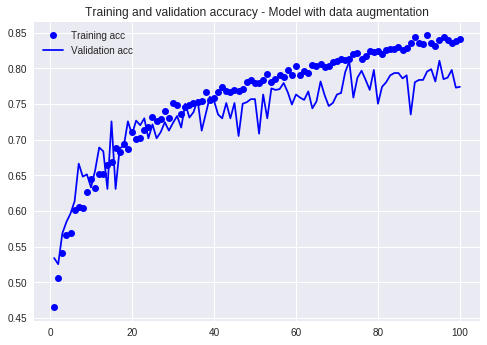

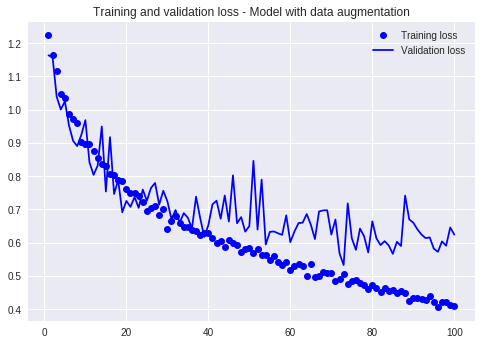

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - Model with data augmentation')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model with data augmentation')
plt.legend()
plt.show()

## Transfer learning with VGG16

### Features extraction only, with no data augmentation
In this scenario, we use only earlier layers, i.e. the convolutional ones, and apply them to our data in order to extract meaningful features.
These extracted features are then fed into a newy trained classifier to predict the class of the flower.

First, load the VGG16 pre-trained model from Keras

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 10s 0us/step


In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

##### Extracting features from vgg16

In [0]:
import numpy as np

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [0]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count, 5))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(224, 224),
                                          batch_size=batch_size,
                                          class_mode='categorical')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [0]:
train_size = len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + \
len(os.listdir(train_rose_dir)) + len(os.listdir(train_sunflower_dir)) + \
len(os.listdir(train_tulip_dir))

test_size = len(os.listdir(test_daisy_dir)) + len(os.listdir(test_dandelion_dir)) + \
len(os.listdir(test_rose_dir)) + len(os.listdir(test_sunflower_dir)) + \
len(os.listdir(test_tulip_dir))

validation_size = len(os.listdir(validation_daisy_dir)) + len(os.listdir(validation_dandelion_dir)) + \
len(os.listdir(validation_rose_dir)) + len(os.listdir(validation_sunflower_dir)) + \
len(os.listdir(validation_tulip_dir))

train_features, train_labels = extract_features(train_dir, train_size)
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 3023 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


Reshaping the extracted features

In [0]:
train_features = np.reshape(train_features, (train_size, 7*7*512))
validation_features = np.reshape(validation_features, (validation_size, 7*7*512))
test_features = np.reshape(test_features, (test_size, 7*7*512))

Now, train the classifier, a densly connected network

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7*7*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 3023 samples, validate on 865 samples
Epoch 1/50
3023/3023 [==============================] - 3s 858us/step - loss: 1.3182 - acc: 0.4813 - val_loss: 0.9695 - val_acc: 0.6798
Epoch 2/50
3023/3023 [==============================] - 2s 784us/step - loss: 0.9336 - acc: 0.6718 - val_loss: 0.7762 - val_acc: 0.7457
Epoch 3/50
3023/3023 [==============================] - 2s 774us/step - loss: 0.7986 - acc: 0.7281 - val_loss: 0.7429 - val_acc: 0.7410
Epoch 4/50
3023/3023 [==============================] - 2s 775us/step - loss: 0.7088 - acc: 0.7555 - val_loss: 0.6508 - val_acc: 0.7723
Epoch 5/50
3023/3023 [==============================] - 2s 789us/step - loss: 0.6251 - acc: 0.7926 - val_loss: 0.6206 - val_acc: 0.7884
Epoch 6/50
1780/3023 [================>.............] - ETA: 0s - loss: 0.5507 - acc: 0.82473023/3023 [==============================] - 2s 777us/step - loss: 0.5557 - acc: 0.8204 - val_loss: 0.5896 - val_acc: 0.7965
Epoch 7/50
3023/3023 [==============================] - 

save the features and the model

In [0]:
np.save('/drive/DeepLearning/train_features_from_vgg16.npy', train_features)
np.save('/drive/DeepLearning/validation_features_from_vgg16.npy', validation_features)
np.save('/drive/DeepLearning/test_features_from_vgg16.npy', test_features)

np.save('/drive/DeepLearning/train_labels_from_vgg16.npy', train_labels)
np.save('/drive/DeepLearning/validation_labels_from_vgg16.npy', validation_labels)
np.save('/drive/DeepLearning/test_labels_from_vgg16.npy', test_labels)

model.save('/drive/DeepLearning/model_feat_extract_vgg16_no_data_aug.h5')

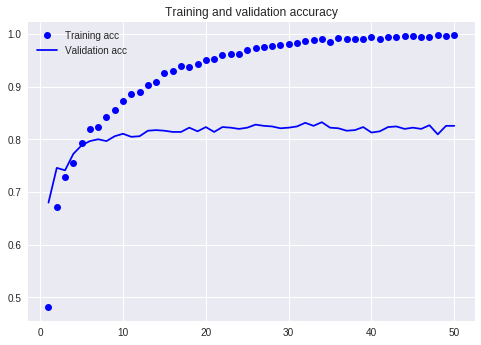

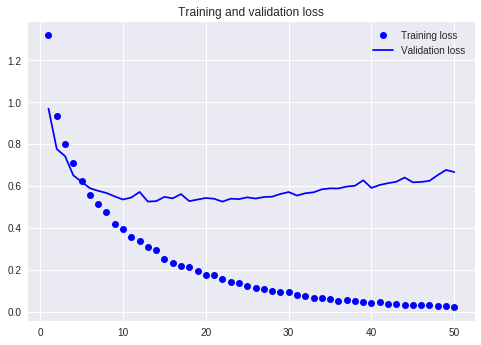

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Transfer learning using data augmentation

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


Freezing vgg16 conv layers

In [0]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4
This is the number of trainable weights after freezing the conv base: 4


Prepare the data

In [0]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical'
                                                    )
validation_generator = test_datagen.flow_from_directory(
                                                  validation_dir,
                                                  target_size=(224, 224),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 3023 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [0]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


#### Save the model after each epoch to avoid loosing all the epochs run before network failure

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
from keras.callbacks import ModelCheckpoint
filepath = '/drive/DeepLearning/vgg16_data_aug_no_fine_tuned_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50, 
                              callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 52s 519ms/step - loss: 0.3182 - acc: 0.8870 - val_loss: 0.5041 - val_acc: 0.8264

Epoch 00001: saving model to /drive/DeepLearning/vgg16_data_aug_no_fine_tuned_01_0.83.hdf5
Epoch 2/30
100/100 [==============================] - 48s 484ms/step - loss: 0.3613 - acc: 0.8767 - val_loss: 0.4604 - val_acc: 0.8365

Epoch 00002: saving model to /drive/DeepLearning/vgg16_data_aug_no_fine_tuned_02_0.84.hdf5
Epoch 3/30
 23/100 [=====>........................] - ETA: 20s - loss: 0.3102 - acc: 0.8761

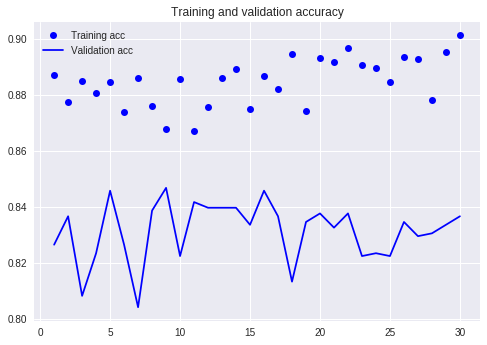

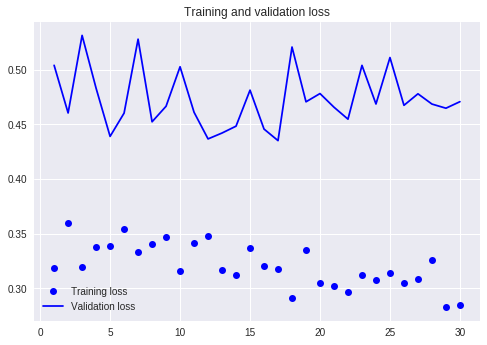

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Fine-tuning vgg16 latest conv layers

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Let's the latest conv layer as trainable, meaning that its weight could be updated during the training

In [0]:
conv_base.trainable = True

In [0]:
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else :
    layer.trainable = False

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc']) 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
filepath = '/drive/DeepLearning/vgg16_data_aug_with_fine_tuning_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=10,
                             validation_data=validation_generator,
                             validation_steps=50,
                             callbacks=callbacks_list)

Epoch 1/10
100/100 [==============================] - 52s 524ms/step - loss: 0.1757 - acc: 0.9600 - val_loss: 0.1538 - val_acc: 0.9635

Epoch 00001: val_acc improved from -inf to 0.96349, saving model to /drive/DeepLearning/vgg16_data_aug_with_fine_tuning_01_0.96.hdf5
Epoch 2/10
100/100 [==============================] - 48s 484ms/step - loss: 0.1661 - acc: 0.9580 - val_loss: 0.1502 - val_acc: 0.9513

Epoch 00002: val_acc did not improve from 0.96349
Epoch 3/10
 98/100 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9592100/100 [==============================] - 48s 481ms/step - loss: 0.1345 - acc: 0.9585 - val_loss: 0.1416 - val_acc: 0.9615

Epoch 00003: val_acc did not improve from 0.96349
Epoch 4/10
100/100 [==============================] - 50s 497ms/step - loss: 0.1299 - acc: 0.9615 - val_loss: 0.1082 - val_acc: 0.9675

Epoch 00004: val_acc improved from 0.96349 to 0.96755, saving model to /drive/DeepLearning/vgg16_data_aug_with_fine_tuning_04_0.97.hdf5
Epoch 5/

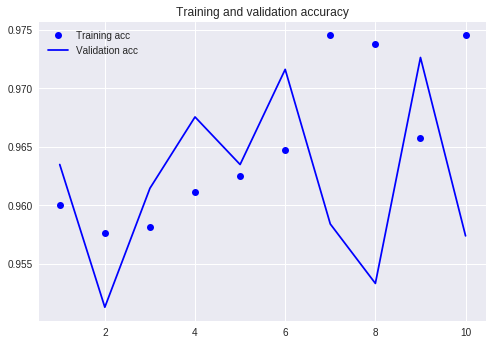

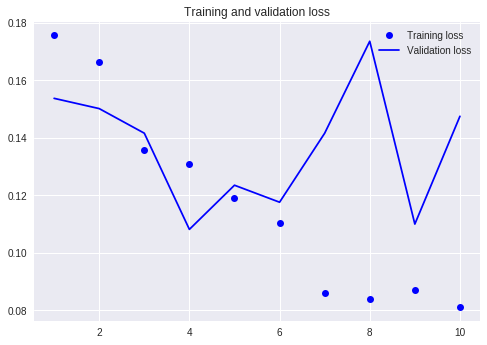

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Lets load the saved model

In [0]:
from keras.models import load_model

In [0]:
model = load_model('/drive/DeepLearning/vgg16_data_aug_with_fine_tuning_62_0.91.hdf5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
test_data = ImageDataGenerator(rescale=1./255)

test_generator = test_data.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               class_mode=None,
                                               shuffle=False)

Found 434 images belonging to 5 classes.


In [0]:
test_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [0]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [0]:
preds = model.predict_generator(test_generator)

In [0]:
preds.shape

(434, 5)

In [0]:
probs = preds.sum(axis=1)

In [0]:
probs

array([4.59104300e-01, 9.75587726e-01, 3.77487481e-01, 1.62548631e-01,
       1.06094405e-01, 1.00000000e+00, 1.00000274e+00, 9.55322325e-01,
       9.99999404e-01, 8.10783446e-01, 3.02974903e-03, 1.00000000e+00,
       9.98631001e-01, 3.86190444e-01, 9.94594097e-01, 9.86011446e-01,
       8.51210475e-01, 1.00000000e+00, 9.98968899e-01, 1.54350335e-02,
       1.90257120e+00, 9.99999881e-01, 1.09721790e-03, 1.00000000e+00,
       4.41899300e-01, 9.82833028e-01, 1.00038576e+00, 9.99999046e-01,
       2.65839845e-02, 8.37378353e-02, 6.34291887e-01, 1.11533571e-02,
       6.02031068e-04, 3.56613435e-02, 2.88188785e-01, 7.57710993e-01,
       5.82724094e-01, 9.99662757e-01, 8.46919417e-01, 9.92283940e-01,
       7.07267940e-01, 9.60409045e-01, 1.00007498e+00, 1.71423033e-02,
       9.99999702e-01, 9.99645472e-01, 9.99999881e-01, 1.00002539e+00,
       9.99966741e-01, 2.36397088e-01, 1.32417798e-01, 9.97950315e-01,
       4.85957801e-01, 5.88459015e-01, 1.00000000e+00, 9.97942150e-01,
      

In [0]:
from sklearn.metrics import confusion_matrix

y_true = test_generator.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)

In [0]:
cm

array([[71,  1,  1,  3,  1],
       [12, 88,  2,  2,  2],
       [ 6,  0, 67,  1,  5],
       [14,  3,  2, 51,  4],
       [ 1,  6, 12,  7, 73]])

In [0]:
cm

In [0]:
diffs = y_pred==y_true

In [0]:
incorrect_preds = []
for i in range(len(diffs)):
  if not diffs[i]:
    incorrect_preds.append(test_generator.filenames[i])

In [0]:
len(incorrect_preds)

NameError: ignored

In [0]:
import numpy as np

In [0]:
?test_data.flow_from_directory